In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#pip install imutils

In [3]:
import os
os.chdir('/content/drive/MyDrive/face mask dataset')

In [4]:
#all the necessary dependency
import numpy as np
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [5]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [6]:
#importing our data 
dataset = (r'/content/drive/MyDrive/face mask dataset')
imagePaths = list(paths.list_images(dataset))

In [7]:
#we will save 
data = []
labels = []

In [8]:
#it will save label and
#convert images into array
for i in imagePaths:
  label = i.split(os.path.sep)[-2]
  labels.append(label)
  image = load_img(i, target_size=(224, 224))
  image = img_to_array(image)
  image = preprocess_input(image)
  data.append(image)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [9]:
data[:2]

[array([[[ 0.99215686,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  0.9843137 ],
         [ 1.        ,  0.9764706 ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],
 
        [[ 1.        ,  0.9843137 ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.9843137 ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],
 
        [[ 0.99215686,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  0.9843137 ],
         [ 1.        ,  0.9764706 ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 0.99215686,  0.99215686,  0.99215686]],
 
        ...,
 
        [[ 1.        ,  1.        

In [11]:
#converting into numpy arrays
data = np.array(data, dtype='float32')
labels = np.array(labels)

In [12]:
data

array([[[[ 0.99215686,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  0.9843137 ],
         [ 1.        ,  0.9764706 ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  0.9843137 ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  0.9843137 ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 0.99215686,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  0.9843137 ],
         [ 1.        ,  0.9764706 ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 0.99215686,  0.99215686,  0.99215686]],

        ...,

        [[ 1.        ,  1.        ,  1

In [13]:
#its a classification task so we need 
#to convert them into numerical labels 
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [14]:
labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
#splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(data,
                      labels,test_size=0.20,stratify=labels,random_state=10)

In [16]:
x_train.shape

(3066, 224, 224, 3)

In [17]:
x_test.shape

(767, 224, 224, 3)

In [18]:
y_test.shape

(767, 2)

In [19]:
y_train.shape

(3066, 2)

In [20]:
#data augmentation 
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,
                       width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

In [21]:
#we are doing transfer learning so we will use imagenet weights
#its the pretrainied model , #we will remove the last layers 
#3 becaue RGB(red green blue)
baseModel=MobileNetV2(weights='imagenet',
                      include_top=False,
                      input_tensor=Input(shape=(224,224,3)))

9412608/9406464 [==============================] - 0s 0us/step


In [22]:
#summary of the model
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [23]:

headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

In [24]:
for layers in baseModel.layers:
  layers.trainable = False

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [26]:
learning_rate=0.001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

H=model.fit(
    aug.flow(x_train,y_train,batch_size=BS),
    steps_per_epoch=len(x_train)//BS,
    validation_data=(x_test,y_test),
    validation_steps=len(x_test)//BS,
    epochs=Epochs
)


Epoch 1/20
255/255 [==============================] - 44s 137ms/step - loss: 0.2807 - accuracy: 0.8829 - val_loss: 0.0580 - val_accuracy: 0.9752
Epoch 2/20
255/255 [==============================] - 33s 130ms/step - loss: 0.1028 - accuracy: 0.9623
Epoch 3/20
255/255 [==============================] - 33s 129ms/step - loss: 0.0685 - accuracy: 0.9815
Epoch 4/20
255/255 [==============================] - 33s 129ms/step - loss: 0.0702 - accuracy: 0.9784
Epoch 5/20
255/255 [==============================] - 33s 129ms/step - loss: 0.0695 - accuracy: 0.9747
Epoch 6/20
255/255 [==============================] - 33s 130ms/step - loss: 0.0848 - accuracy: 0.9739
Epoch 7/20
255/255 [==============================] - 33s 129ms/step - loss: 0.0500 - accuracy: 0.9829
Epoch 8/20
255/255 [==============================] - 33s 127ms/step - loss: 0.0536 - accuracy: 0.9816
Epoch 9/20
255/255 [==============================] - 33s 129ms/step - loss: 0.0665 - accuracy: 0.9771
Epoch 10/20
255/255 [==========

In [37]:
!pip3 install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.4.0)


In [38]:
import torchvision
import torch
from torchvision import datasets, models, transforms

In [39]:
model.save('/content/drive/MyDrive/face mask dataset/mobilenet_v2.model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/face mask dataset/mobilenet_v2.model/assets


In [43]:
keras.models.load_model('/content/drive/MyDrive/face mask dataset/mobilenet.h5')

In [29]:

from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/face mask dataset/mobilenet.h5')

In [ ]:
#keras.models.load_models('/content/drive/MyDrive/face mask dataset')

In [30]:
from sklearn.metrics import classification_report

In [31]:
predict = model.predict(x_test, batch_size=BS)
predict = np.argmax(predict, axis=1)
print(classification_report(y_test.argmax(axis=1),predict,
                      target_names = lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      0.99       383
without_mask       1.00      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



In [48]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os

In [49]:
prototxtPath=os.path.sep.join(['/content/drive/MyDrive/face mask dataset','deploy.prototxt'])
weightsPath=os.path.sep.join(['/content/drive/MyDrive/face mask dataset','res10_300x300_ssd_iter_140000.caffemodel'])


In [50]:
net = cv2.dnn.readNet(prototxtPath, weightsPath)

In [51]:
net

<dnn_Net 0x7fd713aacdf0>

In [52]:
model = load_model('mobilenet.h5')

In [73]:
#takes an image and convert them into array
#image = cv2.imread('/content/drive/MyDrive/face mask dataset/exmaple_01.png')

In [105]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('example_03.png')

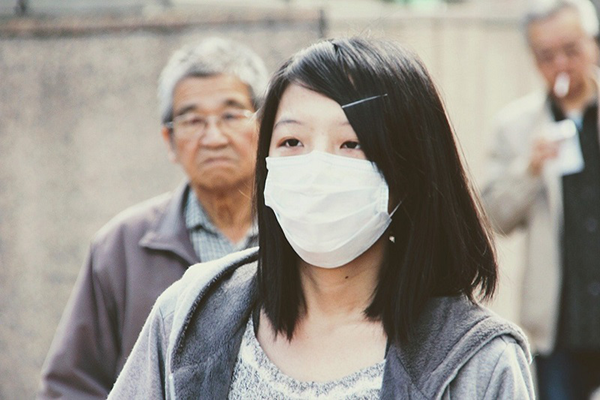

In [107]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [114]:
(h, w) = image.shape[:2]

In [132]:
image

array([[[152, 153, 148],
        [149, 150, 146],
        [149, 150, 146],
        ...,
        [147, 150, 148],
        [145, 148, 146],
        [146, 149, 147]],

       [[147, 149, 146],
        [148, 151, 146],
        [150, 152, 147],
        ...,
        [150, 152, 149],
        [146, 149, 147],
        [145, 148, 146]],

       [[145, 148, 147],
        [147, 150, 147],
        [150, 154, 149],
        ...,
        [153, 153, 151],
        [150, 152, 150],
        [147, 151, 149]],

       ...,

       [[131, 130, 134],
        [129, 129, 132],
        [129, 129, 130],
        ...,
        [173, 177, 181],
        [176, 182, 186],
        [180, 187, 191]],

       [[133, 131, 136],
        [127, 128, 130],
        [130, 133, 133],
        ...,
        [179, 184, 187],
        [181, 187, 190],
        [183, 191, 194]],

       [[130, 130, 135],
        [127, 128, 133],
        [127, 129, 132],
        ...,
        [184, 189, 192],
        [184, 190, 193],
        [186, 193, 196]]

In [116]:
(h , w)

(400, 600)

In [117]:
image

array([[[152, 153, 148],
        [149, 150, 146],
        [149, 150, 146],
        ...,
        [147, 150, 148],
        [145, 148, 146],
        [146, 149, 147]],

       [[147, 149, 146],
        [148, 151, 146],
        [150, 152, 147],
        ...,
        [150, 152, 149],
        [146, 149, 147],
        [145, 148, 146]],

       [[145, 148, 147],
        [147, 150, 147],
        [150, 154, 149],
        ...,
        [153, 153, 151],
        [150, 152, 150],
        [147, 151, 149]],

       ...,

       [[131, 130, 134],
        [129, 129, 132],
        [129, 129, 130],
        ...,
        [173, 177, 181],
        [176, 182, 186],
        [180, 187, 191]],

       [[133, 131, 136],
        [127, 128, 130],
        [130, 133, 133],
        ...,
        [179, 184, 187],
        [181, 187, 190],
        [183, 191, 194]],

       [[130, 130, 135],
        [127, 128, 133],
        [127, 129, 132],
        ...,
        [184, 189, 192],
        [184, 190, 193],
        [186, 193, 196]]

In [118]:
#we are preprocessing scaledown and resize the image we re going to subtract 1.0
#blob takes rgb and our form brg so change it too

blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))

In [119]:
blob

array([[[[ 46.,  44.,  46., ...,  47.,  44.,  41.],
         [ 43.,  45.,  44., ...,  43.,  46.,  43.],
         [ 43.,  44.,  41., ...,  41.,  47.,  46.],
         ...,
         [ 26.,  27.,  34., ...,  45.,  63.,  73.],
         [ 26.,  27.,  32., ...,  52.,  69.,  76.],
         [ 25.,  25.,  33., ...,  62.,  77.,  80.]],

        [[-26., -27., -24., ..., -26., -27., -29.],
         [-27., -25., -26., ..., -27., -26., -27.],
         [-26., -25., -25., ..., -29., -25., -26.],
         ...,
         [-48., -45., -35., ..., -29.,  -8.,   6.],
         [-47., -44., -37., ..., -22.,  -1.,  10.],
         [-48., -46., -36., ..., -12.,   7.,  14.]],

        [[ 24.,  22.,  22., ...,  24.,  24.,  23.],
         [ 24.,  24.,  22., ...,  22.,  25.,  25.],
         [ 25.,  25.,  22., ...,  20.,  26.,  26.],
         ...,
         [ 10.,   9.,  20., ...,  28.,  48.,  62.],
         [ 10.,  10.,  17., ...,  37.,  56.,  67.],
         [ 11.,  10.,  20., ...,  46.,  64.,  71.]]]], dtype=float32)

In [120]:
blob.shape

(1, 3, 300, 300)

In [121]:
#blob scaled down image
net.setInput(blob)

In [122]:
detections = net.forward()

In [123]:
#array that represents the face
detections

array([[[[0.        , 1.        , 0.9996724 , ..., 0.18173477,
          0.43292862, 0.46098718],
         [0.        , 1.        , 0.81118375, ..., 0.02572085,
          0.9942617 , 0.34080845],
         [0.        , 1.        , 0.43454096, ..., 0.19513154,
          0.65238404, 0.6432173 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [124]:
detections.shape[2]

200

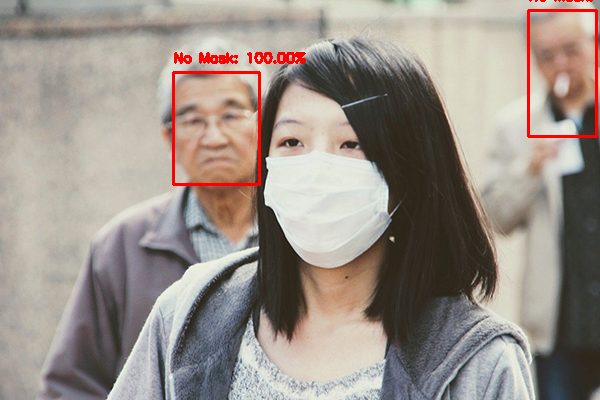

In [126]:
#loop over the detections
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    
    
    if confidence>0.5:
        #we need the X,Y coordinates
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        
        #ensure the bounding boxes fall within the dimensions of the frame
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
        
        #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face=cv2.resize(face,(224,224))
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (mask,withoutMask)=model.predict(face)[0]
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
        
        
        
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

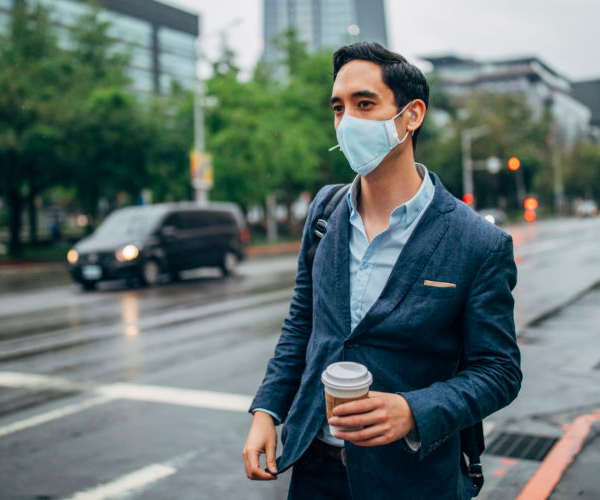

In [75]:
from IPython.display import Image
Image('example_01.png')

In [127]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
from imutils.video import VideoStream
import imutils

In [170]:
def detect_and_predict_mask(frame,faceNet,maskNet):
    #grab the dimensions of the frame and then construct a blob
    (h,w)=frame.shape[:3]
    #mean of r g b is (104.0,177.0,123.0))
    blob=cv2.dnn.blobFromImage(frame,1.0,(300,300),(104.0,177.0,123.0))
    

    faceNet.setInput(blob)
    detections=faceNet.forward()
    
    #initialize our list of faces, their corresponding locations and list of predictions
    
    faces=[]
    locs=[]
    preds=[]
    
    
    for i in range(0,detections.shape[2]):
        confidence=detections[0,0,i,2]
    
    
        if confidence>0.5:
        #we need the X,Y coordinates
            box=detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startX,startY,endX,endY)=box.astype('int')
        
            #ensure the bounding boxes fall within the dimensions of the frame
            (startX,startY)=(max(0,startX),max(0,startY))
            (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
            #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
            face=frame[startY:endY, startX:endX]
            face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
            face=cv2.resize(face,(224,224))
            face=img_to_array(face)
            face=preprocess_input(face)
        
            faces.append(face)
            locs.append((startX,startY,endX,endY))
        
        #only make a predictions if atleast one face was detected
        if len(faces)>0:
            faces=np.array(faces,dtype='float32')
            preds=maskNet.predict(faces,batch_size=12)
        
        return (locs,preds)

In [171]:
prototxtPath=os.path.sep.join(['/content/drive/MyDrive/face mask dataset','deploy.prototxt'])
weightsPath=os.path.sep.join(['/content/drive/MyDrive/face mask dataset','res10_300x300_ssd_iter_140000.caffemodel'])

In [172]:
maskNet = cv2.dnn.readNet(prototxtPath, weightsPath)

In [ ]:
maskNet = load_model('mobilenet.h5')

In [ ]:
masknet